In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")


In [2]:
#COLLECT ALL AVAILABLE DATA FOR Beijing, FROM ALL YEARS
Beijing_Data = pd.read_csv('Beijing_data.csv', index_col=0)

In [3]:
#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Beijing_Data = Beijing_Data.loc[:, Beijing_Data.columns.intersection(cols)]
Beijing_Data = Beijing_Data.apply(pd.to_numeric, errors='coerce')

Beijing_Data = Beijing_Data.fillna(method='ffill')
Beijing_Data = Beijing_Data.fillna(method='bfill')

In [4]:
print("Beijing:\n" + str(Beijing_Data.isna().sum()))

Beijing:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

In [5]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Beijing_Data is stationary :")
for col in Beijing_Data.columns:
    result = adfuller(Beijing_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Beijing_Data is stationary :
p-value for no2 : 0.000000
p-value for o3 : 0.000024
p-value for pm10 : 0.000000
p-value for pm25 : 0.000007
p-value for so2 : 0.000008


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2253.093, Time=1.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1802.016, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1874.232, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2025.808, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1804.011, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2255.132, Time=1.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2244.751, Time=0.92 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2243.342, Time=0.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-2252.907, Time=1.98 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-2253.574, Time=1.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2253.997, Time=0.96 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-2251.509, Time=2.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-2256.710, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2246.446, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0

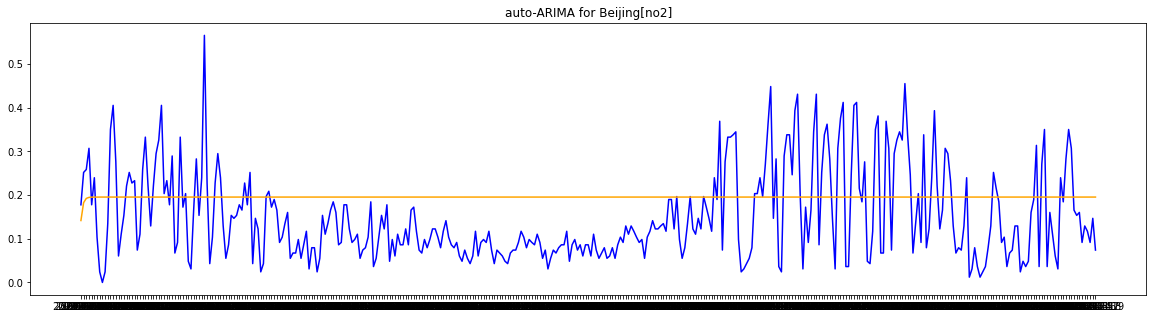

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-2222.765, Time=0.91 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1053.975, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1978.912, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-230.169, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2268.878, Time=0.39 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-834.882, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2163.897, Time=0.31 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-2279.088, Time=0.79 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-1200.632, Time=0.41 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-2277.840, Time=0.89 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-2276.954, Time=0.51 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-1388.711, Time=0.47 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-2276.513, Time=0.88 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-2288.797, Time=1.65 sec
 ARIMA(0,0,3)(0,0,0)[0

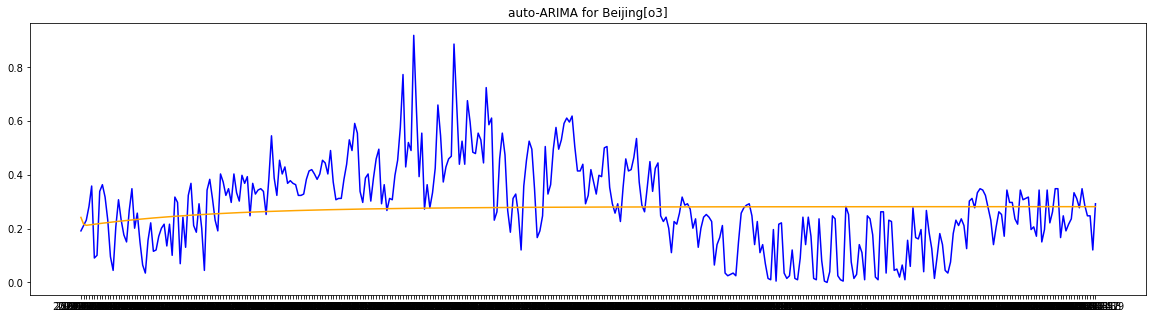

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4987.788, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5069.565, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5198.552, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4989.788, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5432.708, Time=1.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.87 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.93 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.71 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 16.152 seconds
auto-ARIMA MSE for Beijing[pm10]:0.003828470534670772
au

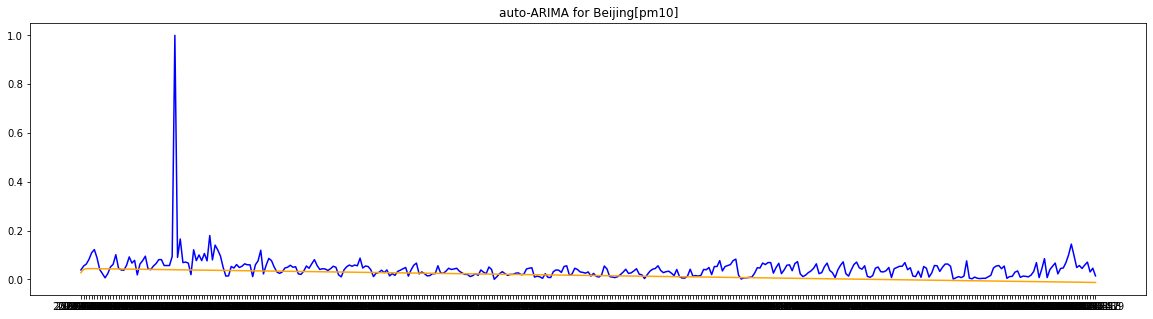

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1790.842, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1851.460, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1932.748, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1792.841, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1934.748, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-2218.221, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-2243.482, Time=0.60 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=inf, Time=0.92 sec


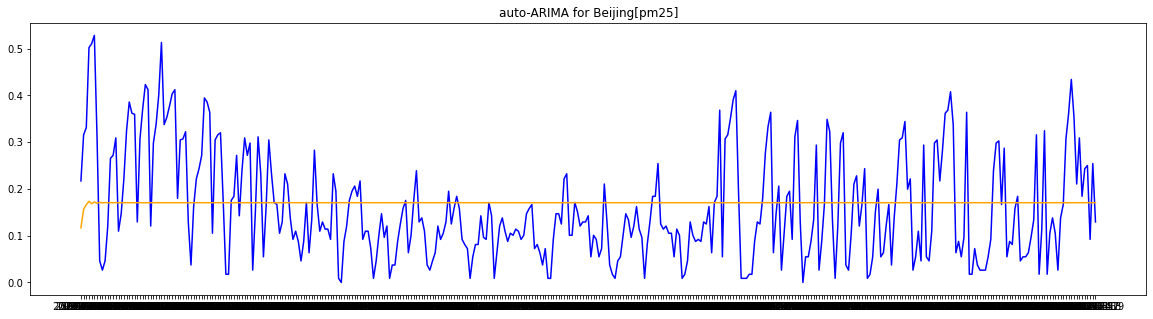

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3208.719, Time=1.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2683.854, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2789.404, Time=0.32 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3048.808, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2685.849, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3213.460, Time=1.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3214.067, Time=0.96 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3213.781, Time=1.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3120.148, Time=1.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3211.124, Time=1.59 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3214.359, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3049.881, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3213.705, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-3214.018, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0

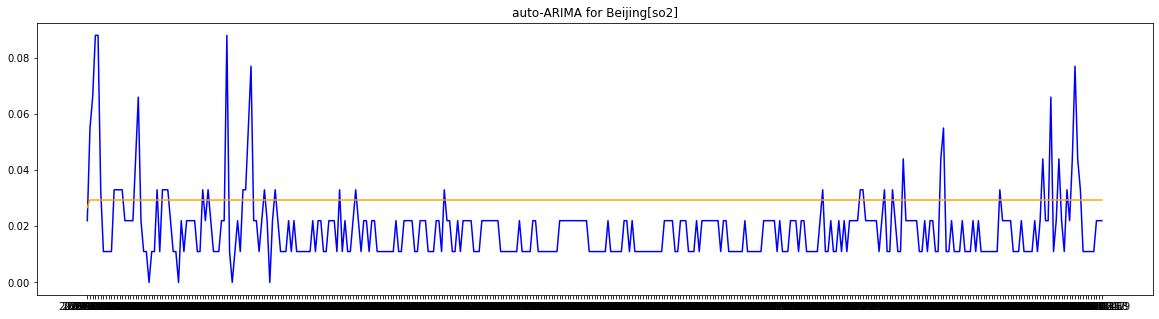

In [6]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
            
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #CALCULATE ERROR METRICS FOR EACH TIME SERIES
        mse = mean_squared_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        print("auto-ARIMA MSE for Beijing[" + str(col) + "]:" + str(mse))
        print("auto-ARIMA RMSE for Beijing[" + str(col) + "]:" + str(rmse))
        print("auto-ARIMA MAE for Beijing[" + str(col) + "]:" + str(mae))
        
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.show()

auto_arima_forecast(Beijing_Data, "Beijing")

# Finding optimal ARIMA parameters manually

In [7]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Beijing_Data is stationary :")
for col in Beijing_Data.columns:
    result = adfuller(Beijing_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Beijing_Data is stationary :
p-value for no2 : 0.000000
p-value for o3 : 0.000024
p-value for pm10 : 0.000000
p-value for pm25 : 0.000007
p-value for so2 : 0.000008


In [8]:
#Order of differencing (d) for 'no2'
print(ndiffs(Beijing_Data['no2'], test='adf'))

#Order of differencing (d) for 'o3'
print(ndiffs(Beijing_Data['o3'], test='adf'))

#Order of differencing (d) for 'pm10'
print(ndiffs(Beijing_Data['pm10'], test='adf'))

#Order of differencing (d) for 'pm25'
print(ndiffs(Beijing_Data['pm25'], test='adf'))

#Order of differencing (d) for 'so2'
print(ndiffs(Beijing_Data['so2'], test='adf'))

0
0
0
0
0


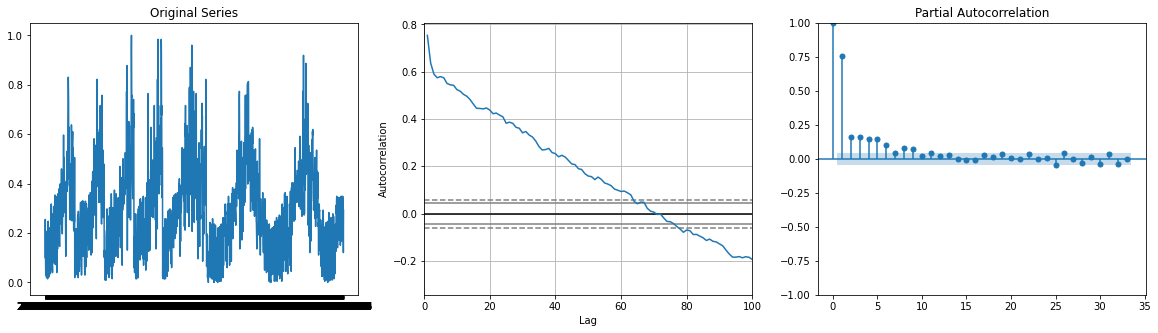

In [9]:
#Ο3
#After checking the results above, the time series that need differencing is Beijing_Data['o3'],
#as p-value for o3 : 0.229985 > 0.05
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['o3']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['o3'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['o3'], ax=axes[2])

plt.show()

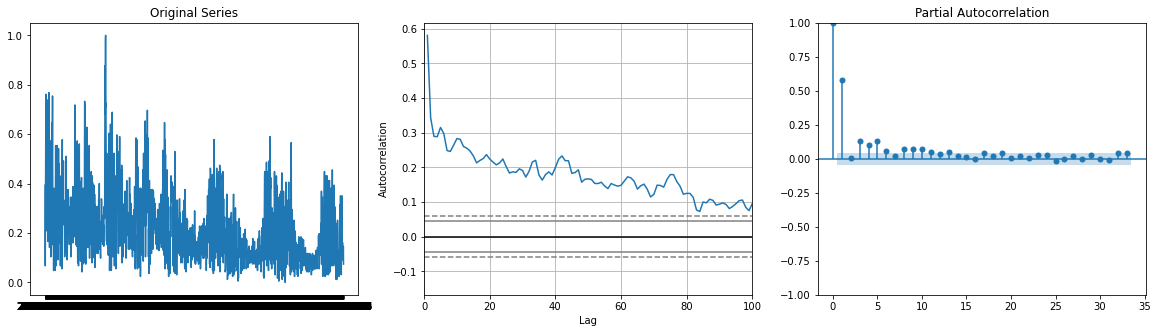

In [10]:
#NO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['no2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['no2'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['no2'], ax=axes[2])

plt.show()

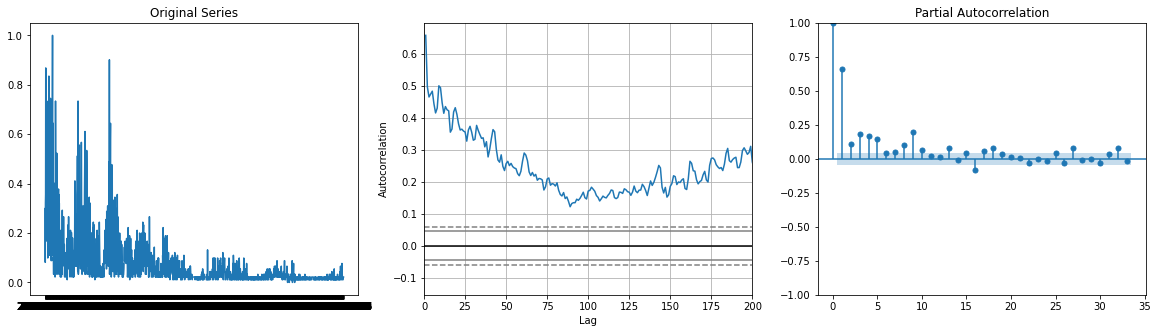

In [11]:
#SO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['so2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['so2'], ax=axes[1])
pl.set_xlim([0,200])
plot_pacf(Beijing_Data['so2'], ax=axes[2])

plt.show()

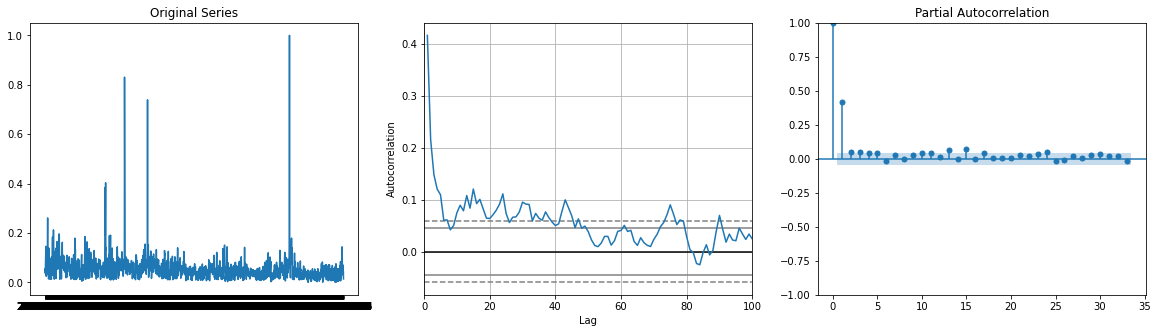

In [12]:
#PM10
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['pm10']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['pm10'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['pm10'], ax=axes[2])

plt.show()

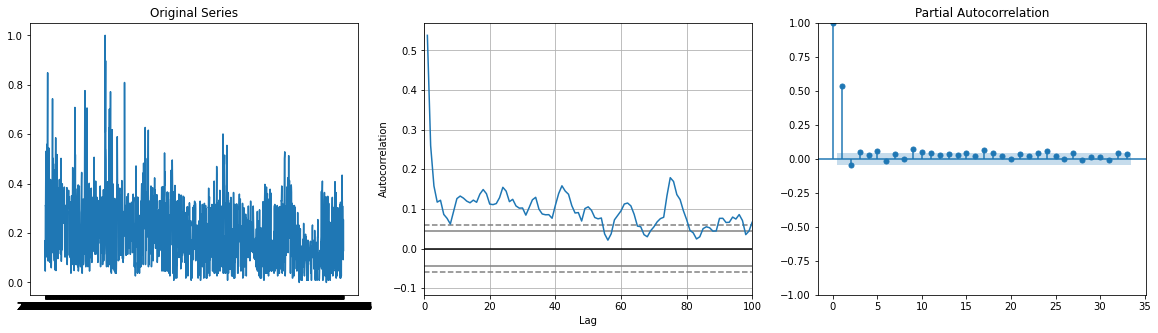

In [13]:
#PM2.5
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Beijing_Data['pm25']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Beijing_Data['pm25'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Beijing_Data['pm25'], ax=axes[2])

plt.show()

In [14]:
#Για κάθε στήλη φτιάχνονται τα διαγράμματα autocorrelation και partial autocorrelation 
#ώστε να προσδιοριστούν που παράμετροι του Autoregression (p) και Moving Average (q).  
#Το p το βρίσκουμε από το partial autocorrelation plot, μετρώντας πόσα σημεία βρίσκονται 
#εκτός της μπλε σκιασμένης περιοχής. Το q το βρίσκουμε με αντίστοιχο τρόπο από το autocorrelation plot.

### Beijing daily predictions (not seasonal)

In [15]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        #print(model_fit.summary())
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])

    #error = math.sqrt(mean_squared_error(test, predictions))
    return predictions, test

In [16]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search

def arima_grid_search(df, pollutant):

    p = q = range(5,11)
    d = range(0,3)
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    combs = {}
    aics = []
    # Grid Search Continued
    for combination in pdq:
        model = ARIMA(df, order=combination)
        model = model.fit()
        #print(model.summary())
        combs.update({model.aic : [combination]})
        aics.append(model.aic)
            
    best_aic = min(aics)
    
    print('best AIC is: ', best_aic)
    print ('ARIMA parameters: ', '\n', 'p: ', combs[best_aic][0][0], '\n', 'd: 0', '\n', 'q: ',combs[best_aic][0][2])
    
    forecast, test = manual_ARIMA(df, (combs[best_aic][0][0], 0, combs[best_aic][0][2]))
    forecast = pd.Series(forecast)
    forecast.index = test.index
    
    print("ARIMA MSE for Beijing " + str(pollutant)+" " + str(mean_squared_error(test, forecast)))
    print("ARIMA RMSE for Beijing " + str(pollutant)+" "  + str(math.sqrt(mean_squared_error(test, forecast))))
    print("ARIMA MAE for Beijing "+ str(pollutant)+" "  + str(mean_absolute_error(test, forecast)))
    
    title = "ARIMA for Beijing" + "[" + str(pollutant) +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test, label='Actual Data', color='blue')
    plt.plot(forecast, label='Predicted Data', color='orange')
    plt.show()

    return forecast, test

best AIC is:  -2956.1262147057364
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Beijing o3 0.009742265687334772
ARIMA RMSE for Beijing o3 0.09870291630612933
ARIMA MAE for Beijing o3 0.0764524667462647


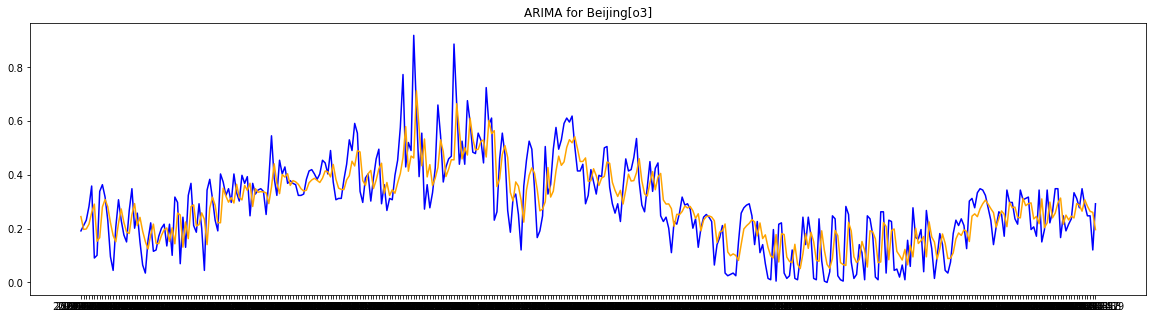

best AIC is:  -3007.439411967194
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  5
ARIMA MSE for Beijing no2 0.007217280916774049
ARIMA RMSE for Beijing no2 0.08495458149372552
ARIMA MAE for Beijing no2 0.06196311089095459


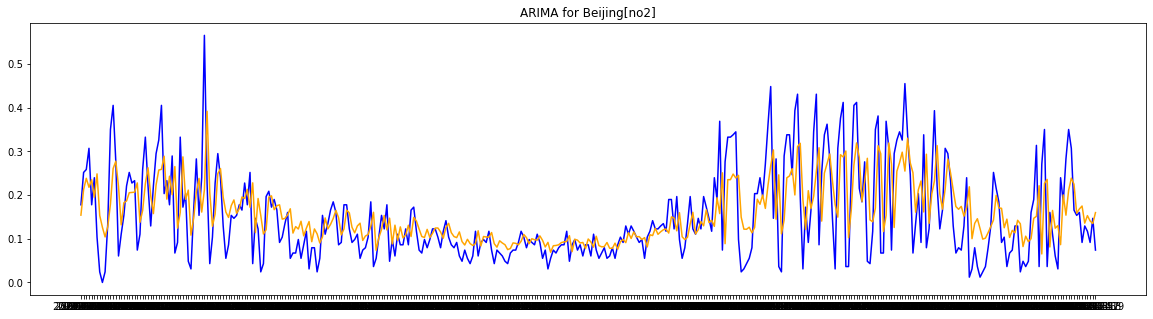

best AIC is:  -4494.430265000143
ARIMA parameters:  
 p:  8 
 d: 0 
 q:  9
ARIMA MSE for Beijing so2 0.00013572941402296016
ARIMA RMSE for Beijing so2 0.011650296735403787
ARIMA MAE for Beijing so2 0.008413783101304693


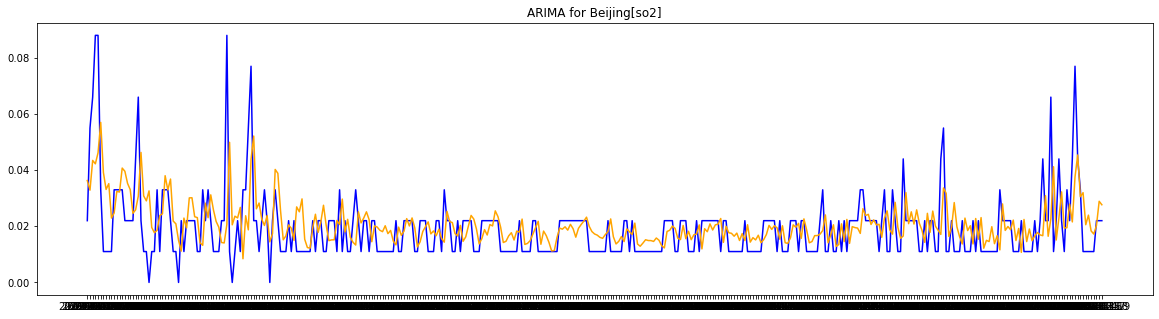

best AIC is:  -6474.243867347641
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Beijing pm10 0.0034040933616860925
ARIMA RMSE for Beijing pm10 0.058344608677118506
ARIMA MAE for Beijing pm10 0.022253824282845332


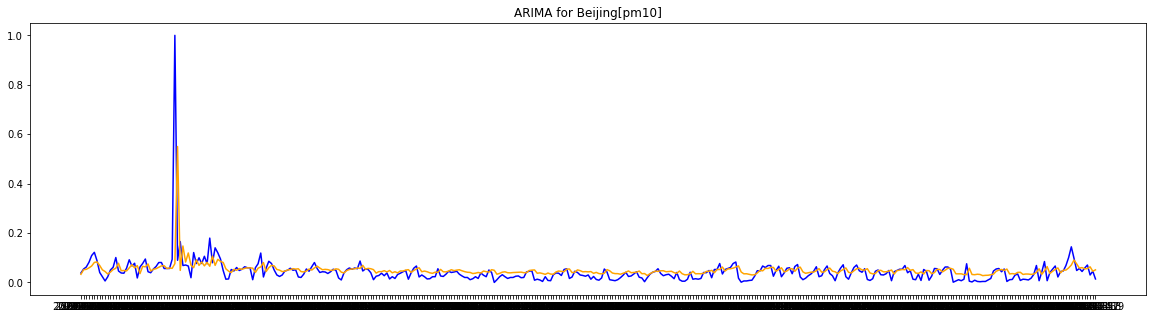

best AIC is:  -2957.771729452335
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  8
ARIMA MSE for Beijing pm25 0.008085992889010902
ARIMA RMSE for Beijing pm25 0.08992214904577682
ARIMA MAE for Beijing pm25 0.07003295308841163


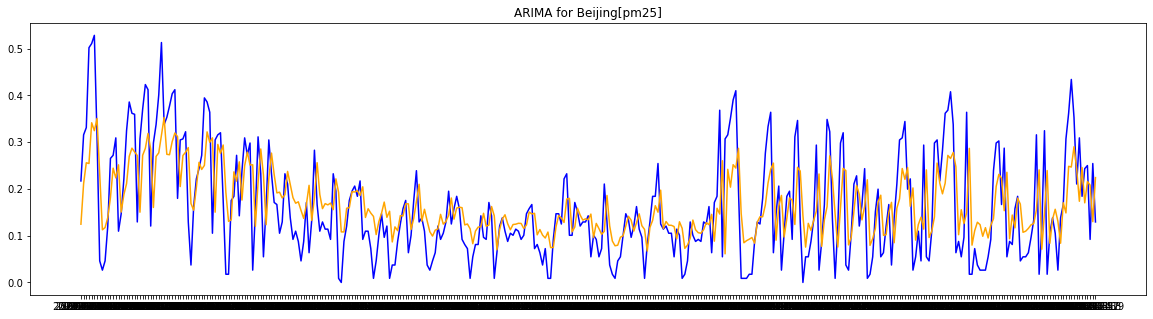

In [17]:
#O3
predictions_o3, test_o3 = arima_grid_search(Beijing_Data['o3'], 'o3')
#NO2
predictions_no2, test_no2 = arima_grid_search(Beijing_Data['no2'], 'no2')
#SO2
predictions_so2, test_so2 = arima_grid_search(Beijing_Data['so2'], 'so2')
#PM10
predictions_pm10, test_pm10 = arima_grid_search(Beijing_Data['pm10'], 'pm10')
#PM25
predictions_pm25, test_pm25 = arima_grid_search(Beijing_Data['pm25'], 'pm25')

## Repeat process for less data

In [18]:
import pandas as pd
Athens_Data = pd.read_csv('Athens_Data.csv', index_col=0)

data_to_drop = len(Beijing_Data) - len(Athens_Data)
Beijing_less_data = Beijing_Data.iloc[data_to_drop: , :]
len(Beijing_less_data)

839

best AIC is:  -1515.6579846547668
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Beijing o3 0.007767172320782752
ARIMA RMSE for Beijing o3 0.08813156256859828
ARIMA MAE for Beijing o3 0.07093835162893287


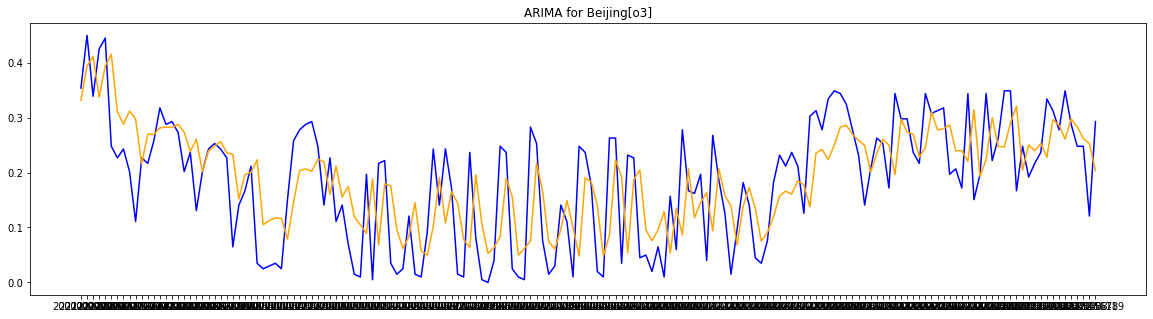

best AIC is:  -1646.0520467268532
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Beijing no2 0.011482392229858276
ARIMA RMSE for Beijing no2 0.10715592484719767
ARIMA MAE for Beijing no2 0.08548221033205812


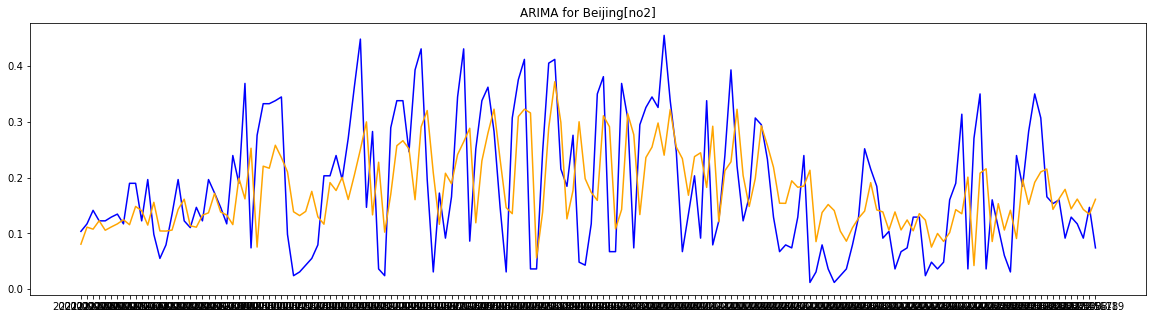

best AIC is:  -4622.739591473461
ARIMA parameters:  
 p:  7 
 d: 0 
 q:  7
ARIMA MSE for Beijing so2 0.00010743981498726912
ARIMA RMSE for Beijing so2 0.010365317891279029
ARIMA MAE for Beijing so2 0.007508739751342541


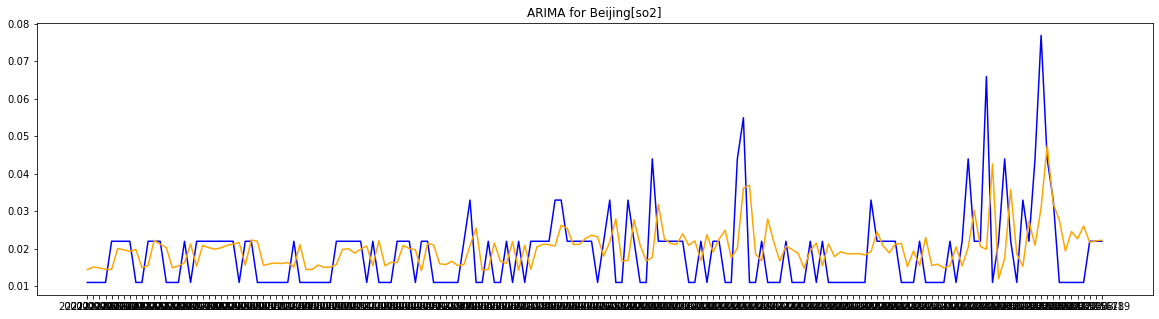

best AIC is:  -2997.0763400749015
ARIMA parameters:  
 p:  7 
 d: 0 
 q:  6
ARIMA MSE for Beijing pm10 0.0004922051428706119
ARIMA RMSE for Beijing pm10 0.02218569680831801
ARIMA MAE for Beijing pm10 0.01859882355630946


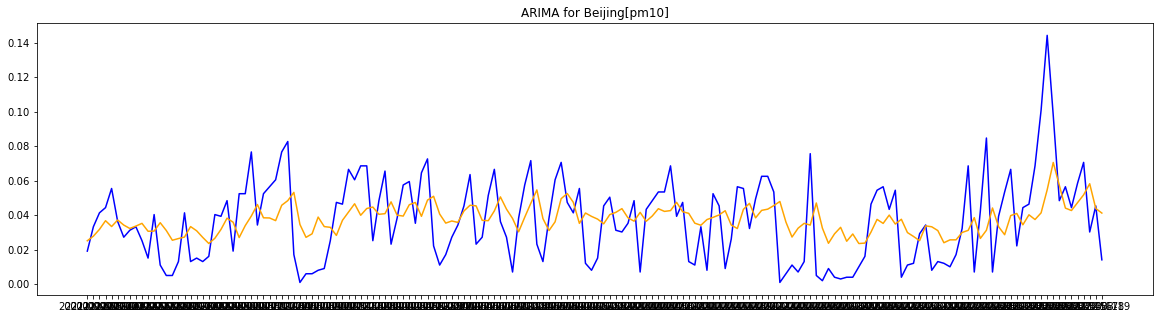

best AIC is:  -1571.8210842645672
ARIMA parameters:  
 p:  9 
 d: 0 
 q:  7
ARIMA MSE for Beijing pm25 0.010541882885322332
ARIMA RMSE for Beijing pm25 0.10267367182156452
ARIMA MAE for Beijing pm25 0.08032834492898612


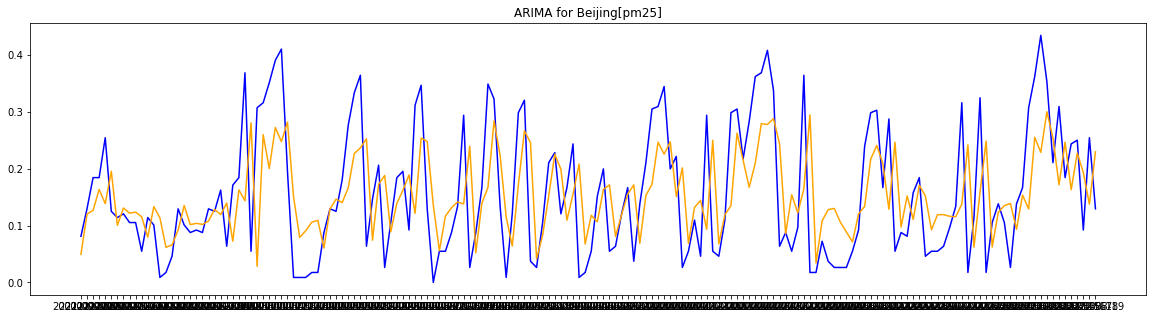

(2021-09-07    0.049319
 2021-09-08    0.120199
 2021-09-09    0.126578
 2021-09-10    0.163436
 2021-09-11    0.138553
                 ...   
 2022-03-15    0.162970
 2022-03-16    0.227262
 2022-03-17    0.193281
 2022-03-18    0.137557
 2022-03-19    0.229662
 Length: 168, dtype: float64,
 2021-09-07    0.081140
 2021-09-08    0.129386
 2021-09-09    0.184211
 2021-09-10    0.184211
 2021-09-11    0.254386
                 ...   
 2022-03-15    0.243421
 2022-03-16    0.250000
 2022-03-17    0.092105
 2022-03-18    0.254386
 2022-03-19    0.129386
 Name: pm25, Length: 168, dtype: float64)

In [19]:
#O3
arima_grid_search(Beijing_less_data['o3'], 'o3')
#NO2
arima_grid_search(Beijing_less_data['no2'], 'no2')
#SO2
arima_grid_search(Beijing_less_data['so2'], 'so2')
#PM10
arima_grid_search(Beijing_less_data['pm10'], 'pm10')
#PM25
arima_grid_search(Beijing_less_data['pm25'], 'pm25')

### Beijing weekly predictions (seasonal)

best AIC is:  -835.5483014690551
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  5
ARIMA MSE for Beijing o3 0.006161953833904571
ARIMA RMSE for Beijing o3 0.07849811356908248
ARIMA MAE for Beijing o3 0.05952523658428046


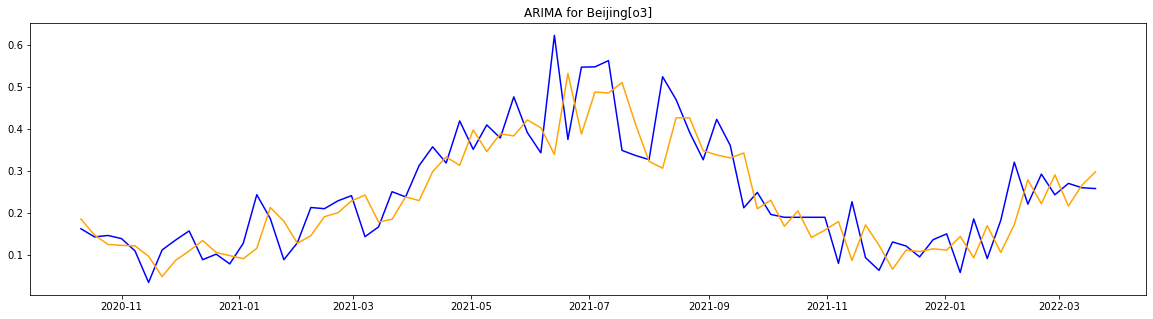

best AIC is:  -976.283163402263
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Beijing no2 0.003919583467218485
ARIMA RMSE for Beijing no2 0.06260657686871632
ARIMA MAE for Beijing no2 0.04785321779231905


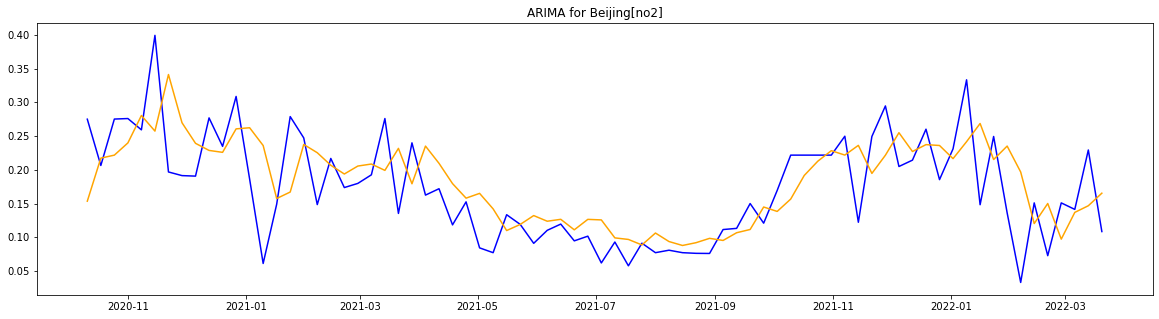

best AIC is:  -1349.934680970237
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Beijing so2 6.505657845431453e-05
ARIMA RMSE for Beijing so2 0.008065765831854687
ARIMA MAE for Beijing so2 0.006128898183604785


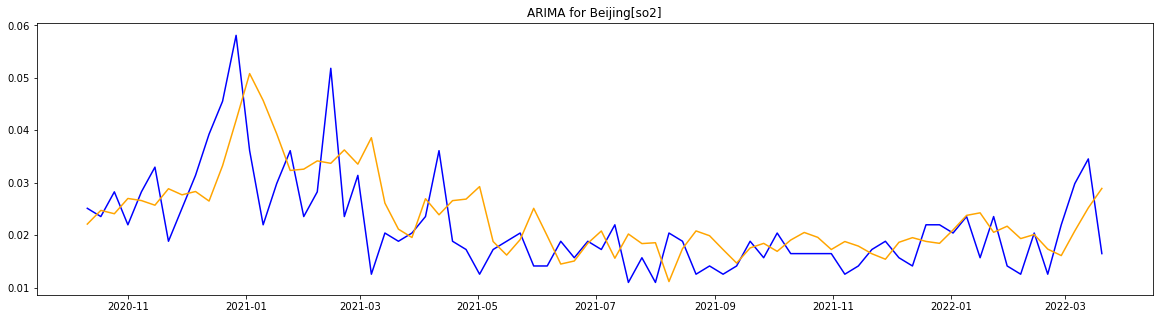

best AIC is:  -1755.941901495752
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Beijing pm10 0.0006234289349236498
ARIMA RMSE for Beijing pm10 0.024968558927652387
ARIMA MAE for Beijing pm10 0.01558721987607755


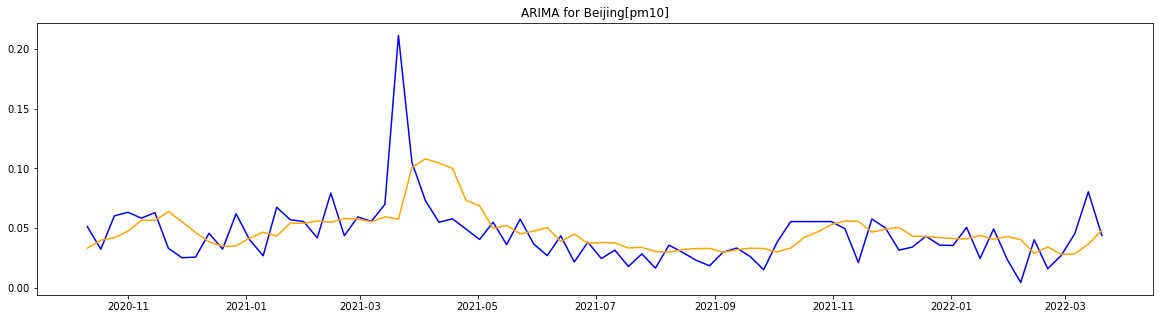

best AIC is:  -959.2661784590248
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Beijing pm25 0.004756809531833038
ARIMA RMSE for Beijing pm25 0.06896962760398985
ARIMA MAE for Beijing pm25 0.05523143178591594


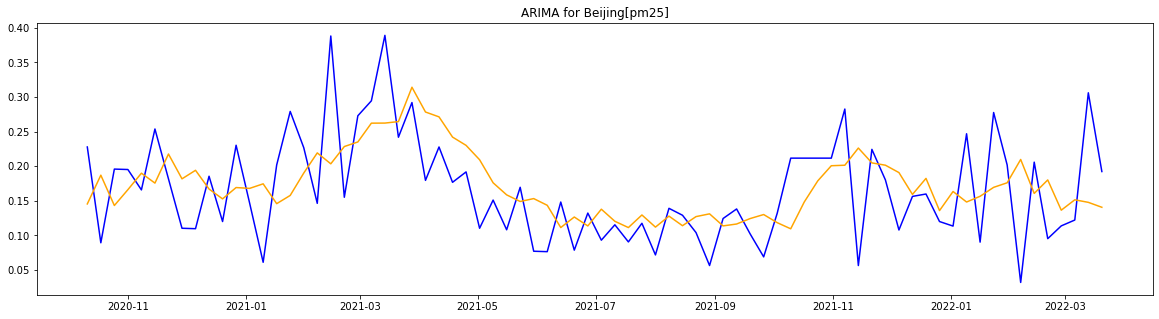

(2020-10-11    0.145423
 2020-10-18    0.186994
 2020-10-25    0.143148
 2020-11-01    0.166042
 2020-11-08    0.189874
                 ...   
 2022-02-20    0.180126
 2022-02-27    0.136403
 2022-03-06    0.151416
 2022-03-13    0.147727
 2022-03-20    0.140604
 Freq: W-SUN, Length: 76, dtype: float64,
 2020-10-11    0.227757
 2020-10-18    0.089286
 2020-10-25    0.195802
 2020-11-01    0.195175
 2020-11-08    0.165727
                 ...   
 2022-02-20    0.095238
 2022-02-27    0.113722
 2022-03-06    0.122180
 2022-03-13    0.306078
 2022-03-20    0.192251
 Freq: W-SUN, Name: pm25, Length: 76, dtype: float64)

In [20]:
Beijing_Data.index = pd.to_datetime(Beijing_Data.index)
Beijing_weekly = Beijing_Data.resample("1w").mean().bfill()

#O3
arima_grid_search(Beijing_weekly['o3'], 'o3')
#NO2
arima_grid_search(Beijing_weekly['no2'], 'no2')
#SO2
arima_grid_search(Beijing_weekly['so2'], 'so2')
#PM10
arima_grid_search(Beijing_weekly['pm10'], 'pm10')
#PM25
arima_grid_search(Beijing_weekly['pm25'], 'pm25')

### Beijing monthly predictions (seasonal)

In [21]:
Beijing_Data.index = pd.to_datetime(Beijing_Data.index)
Beijing_monthly = Beijing_Data.resample("1m").mean().bfill()

best AIC is:  -188.36107172529935
ARIMA parameters:  
 p:  10 
 d: 0 
 q:  8
ARIMA MSE for Beijing o3 0.003166843742153108
ARIMA RMSE for Beijing o3 0.056274716722104504
ARIMA MAE for Beijing o3 0.0419927098448906


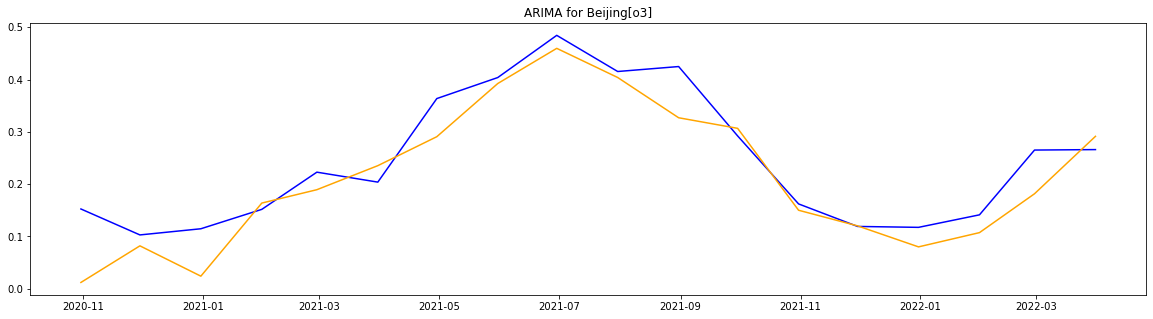

best AIC is:  -235.34796560529833
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Beijing no2 0.0016583465798675836
ARIMA RMSE for Beijing no2 0.04072280171927742
ARIMA MAE for Beijing no2 0.03296161988800609


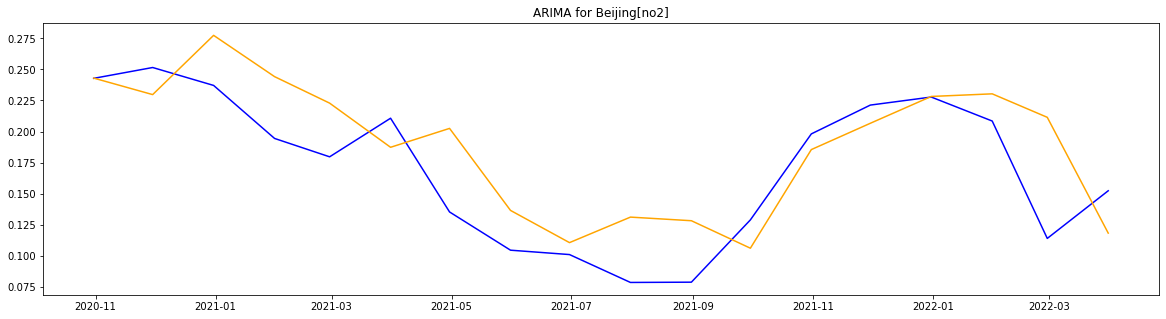

best AIC is:  -312.38910475851605
ARIMA parameters:  
 p:  6 
 d: 0 
 q:  7
ARIMA MSE for Beijing so2 0.00011641627512773143
ARIMA RMSE for Beijing so2 0.010789637395562997
ARIMA MAE for Beijing so2 0.008990708241748037


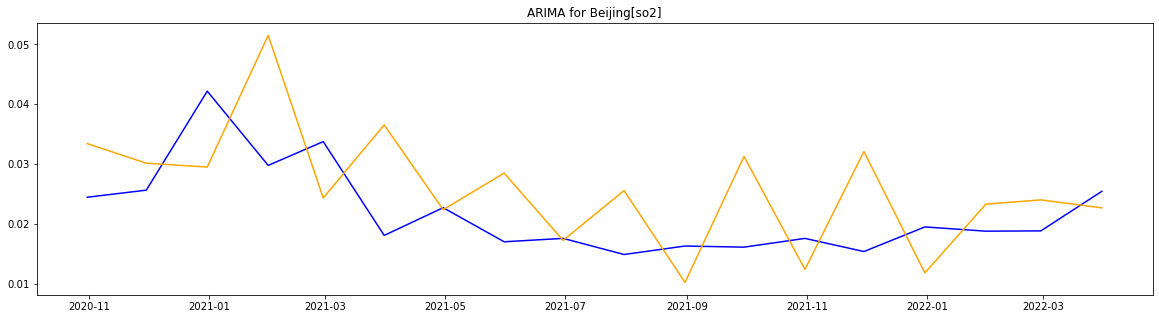

best AIC is:  -450.509566183076
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Beijing pm10 0.00040571580147766317
ARIMA RMSE for Beijing pm10 0.020142388177117013
ARIMA MAE for Beijing pm10 0.01563457431846187


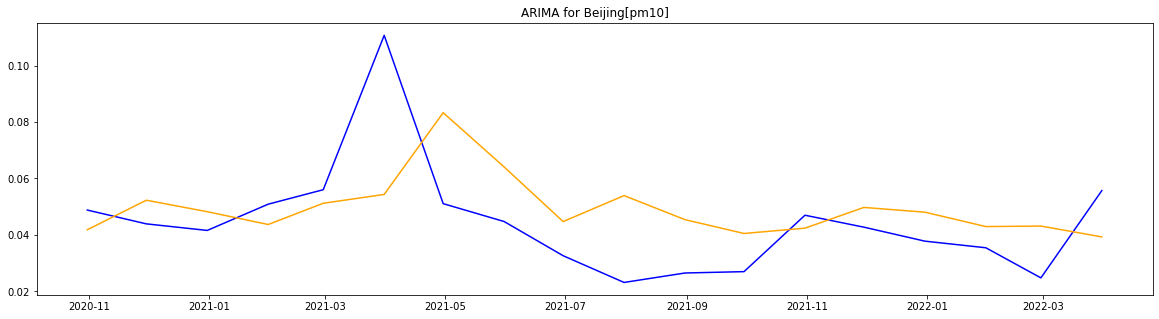

best AIC is:  -257.23561422202886
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Beijing pm25 0.0015430650479943237
ARIMA RMSE for Beijing pm25 0.03928186665618531
ARIMA MAE for Beijing pm25 0.032689480382241023


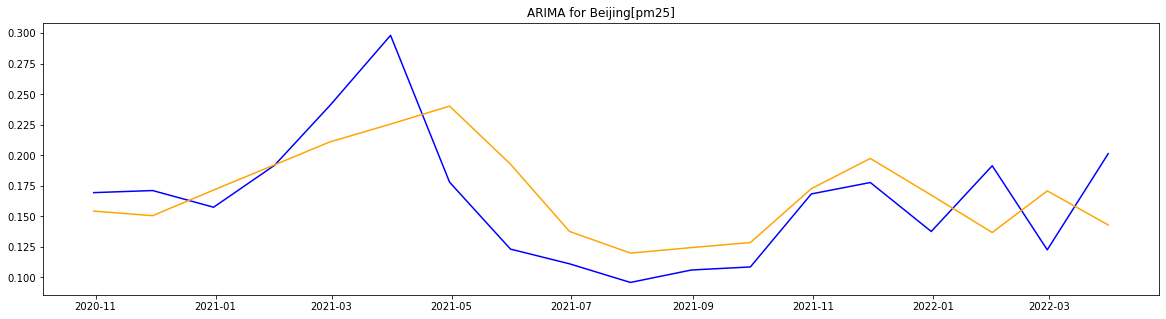

(2020-10-31    0.154359
 2020-11-30    0.150615
 2020-12-31    0.171625
 2021-01-31    0.192268
 2021-02-28    0.210933
 2021-03-31    0.225619
 2021-04-30    0.240352
 2021-05-31    0.192799
 2021-06-30    0.137709
 2021-07-31    0.119968
 2021-08-31    0.124461
 2021-09-30    0.128608
 2021-10-31    0.172723
 2021-11-30    0.197505
 2021-12-31    0.167459
 2022-01-31    0.136837
 2022-02-28    0.170919
 2022-03-31    0.143018
 Freq: M, dtype: float64,
 2020-10-31    0.169496
 2020-11-30    0.171199
 2020-12-31    0.157541
 2021-01-31    0.191921
 2021-02-28    0.240602
 2021-03-31    0.298316
 2021-04-30    0.178070
 2021-05-31    0.123231
 2021-06-30    0.111184
 2021-07-31    0.095925
 2021-08-31    0.106112
 2021-09-30    0.108626
 2021-10-31    0.168421
 2021-11-30    0.177778
 2021-12-31    0.137663
 2022-01-31    0.191497
 2022-02-28    0.122650
 2022-03-31    0.201408
 Freq: M, Name: pm25, dtype: float64)

In [22]:
#O3
arima_grid_search(Beijing_monthly['o3'], 'o3')
#NO2
arima_grid_search(Beijing_monthly['no2'], 'no2')
#SO2
arima_grid_search(Beijing_monthly['so2'], 'so2')
#PM10
arima_grid_search(Beijing_monthly['pm10'], 'pm10')
#PM25
arima_grid_search(Beijing_monthly['pm25'], 'pm25')

### Comparison of monthly predicted and actual data

In [23]:
Beijing_Data.index = pd.to_datetime(Beijing_Data.index)

In [24]:
Beijing_monthly = Beijing_Data.resample("1m").mean().bfill()

In [25]:
predictions_o3.index = pd.to_datetime(predictions_o3.index)
predictions_no2.index = pd.to_datetime(predictions_no2.index)
predictions_so2.index = pd.to_datetime(predictions_so2.index)
predictions_pm10.index = pd.to_datetime(predictions_pm10.index)
predictions_pm25.index = pd.to_datetime(predictions_pm25.index)

test_o3.index = pd.to_datetime(test_o3.index)
test_no2.index = pd.to_datetime(test_no2.index)
test_so2.index = pd.to_datetime(test_so2.index)
test_pm10.index = pd.to_datetime(test_pm10.index)
test_pm25.index = pd.to_datetime(test_pm25.index)

In [26]:
preds_monthly = [predictions_o3.resample("1m").mean().bfill(), predictions_no2.resample("1m").mean().bfill(), 
                 predictions_so2.resample("1m").mean().bfill(), predictions_pm10.resample("1m").mean().bfill(),
                 predictions_pm25.resample("1m").mean().bfill()]
test_monthly = [test_o3.resample("1m").mean().bfill(), test_no2.resample("1m").mean().bfill(), test_so2.resample("1m").mean().bfill(),
                test_pm10.resample("1m").mean().bfill(), test_pm25.resample("1m").mean().bfill()]

In [27]:
print("O3\n")
print("ARIMA MSE for Beijing[O3]:" + str(mean_squared_error(test_monthly[0], preds_monthly[0])))
print("ARIMA RMSE for Beijing[O3]:" + str(math.sqrt(mean_squared_error(test_monthly[0], preds_monthly[0]))))
print("ARIMA MAE for Beijing[O3]:" + str(mean_absolute_error(test_monthly[0], preds_monthly[0])))
print("\n")

print("NO2\n")
print("ARIMA MSE for Beijing[NO2]:" + str(mean_squared_error(test_monthly[1], preds_monthly[1])))
print("ARIMA RMSE for Beijing[NO2]:" + str(math.sqrt(mean_squared_error(test_monthly[1], preds_monthly[1]))))
print("ARIMA MAE for Beijing[NO2]:" + str(mean_absolute_error(test_monthly[1], preds_monthly[1])))
print("\n")

print("SO2\n")
print("ARIMA MSE for Beijing[SO2]:" + str(mean_squared_error(test_monthly[2], preds_monthly[2])))
print("ARIMA RMSE for Beijing[SO2]:" + str(math.sqrt(mean_squared_error(test_monthly[2], preds_monthly[2]))))
print("ARIMA MAE for Beijing[SO2]:" + str(mean_absolute_error(test_monthly[2], preds_monthly[2])))
print("\n")

print("PM10\n")
print("ARIMA MSE for Beijing[PM10]:" + str(mean_squared_error(test_monthly[3], preds_monthly[3])))
print("ARIMA RMSE for Beijing[PM10]:" + str(math.sqrt(mean_squared_error(test_monthly[3], preds_monthly[3]))))
print("ARIMA MAE for Beijing[PM10]:" + str(mean_absolute_error(test_monthly[3], preds_monthly[3])))
print("\n")

print("PM25\n")
print("ARIMA MSE for Beijing[PM25]:" + str(mean_squared_error(test_monthly[4], preds_monthly[4])))
print("ARIMA RMSE for Beijing[PM25]:" + str(math.sqrt(mean_squared_error(test_monthly[4], preds_monthly[4]))))
print("ARIMA MAE for Beijing[PM25]:" + str(mean_absolute_error(test_monthly[4], preds_monthly[4])))

O3

ARIMA MSE for Beijing[O3]:0.00029956643290005903
ARIMA RMSE for Beijing[O3]:0.017307987546218626
ARIMA MAE for Beijing[O3]:0.013258781750821987


NO2

ARIMA MSE for Beijing[NO2]:0.0002827813909014287
ARIMA RMSE for Beijing[NO2]:0.01681610510497091
ARIMA MAE for Beijing[NO2]:0.01471135232869517


SO2

ARIMA MSE for Beijing[SO2]:4.720802567650699e-06
ARIMA RMSE for Beijing[SO2]:0.0021727407962411666
ARIMA MAE for Beijing[SO2]:0.0017308329350055277


PM10

ARIMA MSE for Beijing[PM10]:0.00013875990337026403
ARIMA RMSE for Beijing[PM10]:0.011779639356545005
ARIMA MAE for Beijing[PM10]:0.010183090244783961


PM25

ARIMA MSE for Beijing[PM25]:0.0006706524926225173
ARIMA RMSE for Beijing[PM25]:0.025896959138526618
ARIMA MAE for Beijing[PM25]:0.02280005331186324
